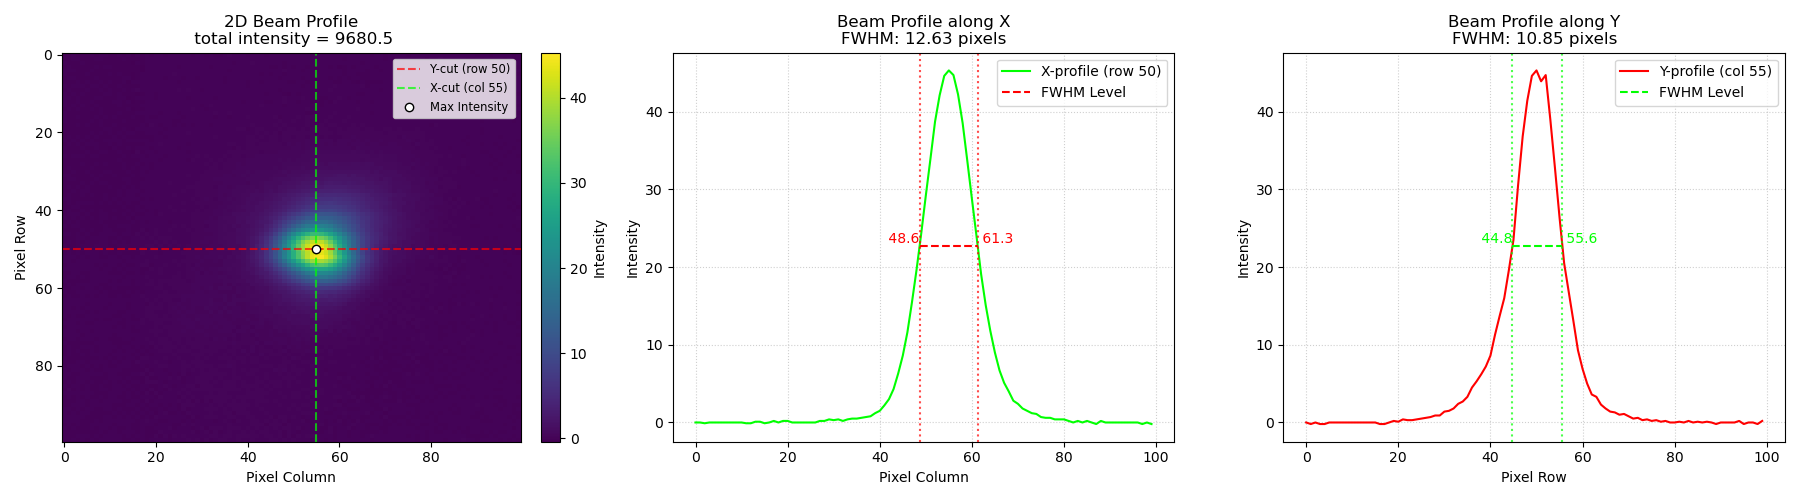

In [1]:

%matplotlib widget
from Code_utilities.BeamAnalysis import BeamAnalysis
from Code_utilities.BeamCharacteristicsExtractor import BeamCharacteristicsExtractor
import numpy as np

dir_path_HIKMICRO = '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/SpectralResponseComparison/HIKMICRO'
filename = 'LP 10 THz.csv'
x_center_HIKMICRO = 139 - 5
y_center_HIKMICRO = 107
width = 100
crop_x_range_HIKMICRO = (x_center_HIKMICRO - width / 2, x_center_HIKMICRO + width / 2)
crop_y_range_HIKMICRO = (y_center_HIKMICRO - width / 2, y_center_HIKMICRO + width / 2)
beam_analysis_HIKMICRO = BeamAnalysis(dir_path=dir_path_HIKMICRO,
                                      signal_filename=filename,
                                      camera_name='HIKMICRO',
                                      crop_range_x_pixels=crop_x_range_HIKMICRO,
                                      crop_range_y_pixels=crop_y_range_HIKMICRO)
HIKMICRO_map_array = beam_analysis_HIKMICRO.map_array
fhwm_extractor_HIKMICRO = BeamCharacteristicsExtractor(map_array=HIKMICRO_map_array,
                                                       camera_name='HIKMICRO')
fig_fwhm_extractor_HIKMICRO, axs_fwhm_extractor_HIKMICRO = fhwm_extractor_HIKMICRO.plot_analysis()
fig_fwhm_extractor_HIKMICRO.set_size_inches(12,
                                            5)
HIKMICRO_bg_subtracted_map_array = fhwm_extractor_HIKMICRO.map_array / np.max(fhwm_extractor_HIKMICRO.map_array)

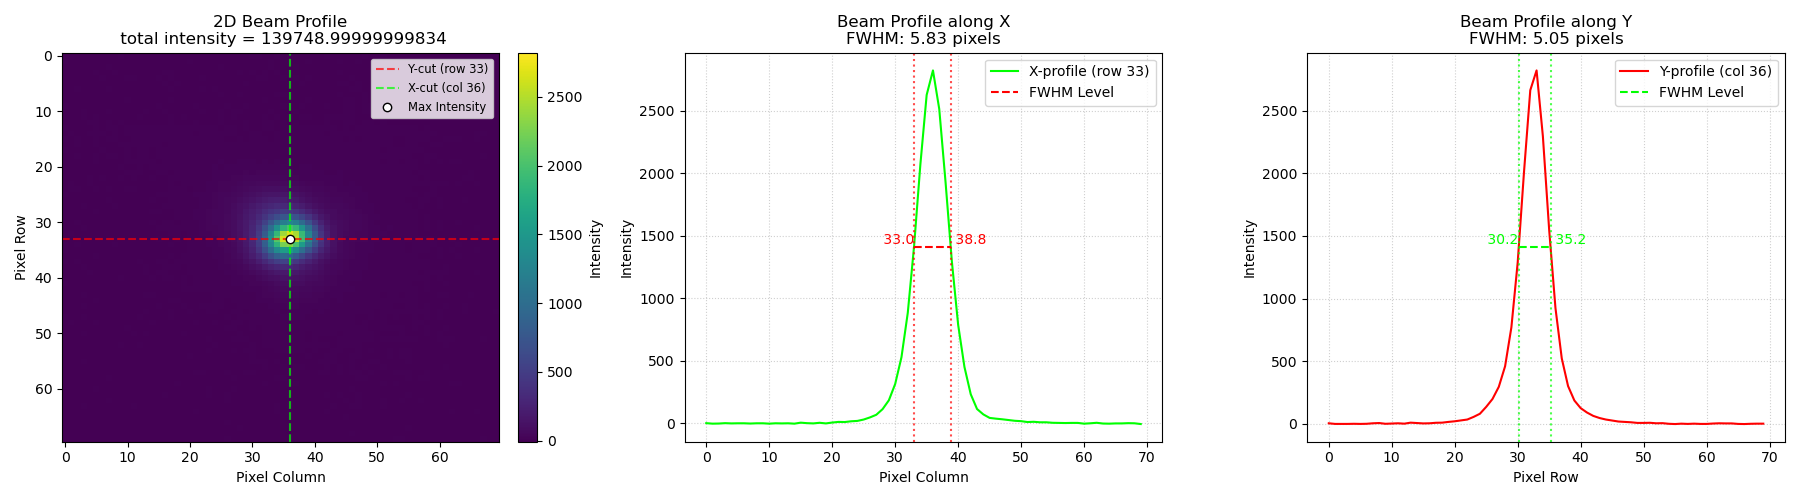

In [2]:
from Code_utilities.BeamAnalysis import BeamAnalysis
from Code_utilities.BeamCharacteristicsExtractor import BeamCharacteristicsExtractor
import numpy as np

%matplotlib widget
# dir_path_NEC = '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250603/NEC_PositionSeries/all_measurements'
# filename = '1,55 mm.csv'
dir_path_NEC = '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/SpectralResponseComparison/NEC'
filename = 'LP 10 THz.csv'
x_center_NEC = 110 + 15
y_center_NEC = 202
width = 70
crop_x_range_NEC = (x_center_NEC - width / 2, x_center_NEC + width / 2)
crop_y_range_NEC = (y_center_NEC - width / 2, y_center_NEC + width / 2)
beam_analysis_NEC = BeamAnalysis(dir_path=dir_path_NEC,
                                 signal_filename=filename,
                                 camera_name='NEC',
                                 crop_range_x_pixels=crop_x_range_NEC,
                                 crop_range_y_pixels=crop_y_range_NEC)

Y_ref_position_for_background_subtraction_NEC = 2
map_array_NEC = beam_analysis_NEC.map_array
fhwm_extractor_NEC = BeamCharacteristicsExtractor(map_array=map_array_NEC,
                                                  camera_name='NEC',
                                                  Y_ref_position_for_background_subtraction=Y_ref_position_for_background_subtraction_NEC)
fig_fwhm_extractor_NEC, axs_fwhm_extractor_NEC = fhwm_extractor_NEC.plot_analysis()
fig_fwhm_extractor_NEC.set_size_inches(12,
                                       5)
NEC_bg_subtracted_map_array = fhwm_extractor_NEC.map_array / np.max(fhwm_extractor_NEC.map_array)

 Y Axis label removed
 Y Axis label removed
 Y Axis label removed
Plot saved to Beam_Comparison.pdf


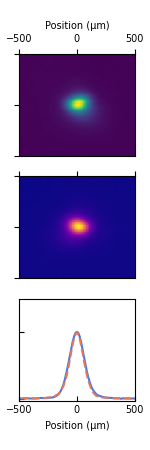

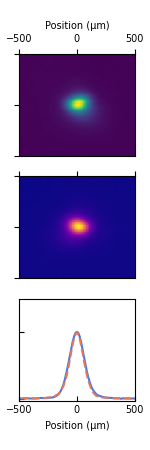

In [4]:
%matplotlib widget
import os
from ManuscriptAnalysis.Spectral_Analysis.NewAnalysis_w_DoubleFilters.SideBySideComparison.FunctionsBeamComparison import (plot_beam_comparison_for_paper)

save_dir = '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/Manuscripts/Low THz Camera MS/Figures/Figure 4'

x_shift_beam_1 = +3
y_shift_beam_1 = +5
plot_size_um = 500
figures_x_size_inches = 1.5
figures_y_size_inches = 1.5
fontsize=7
x_shift_thz_um = 2
bool_remove_y_labels = True
bool_remove_profile_comparison_legend = True

fig, axs = plot_beam_comparison_for_paper(beam1_data=HIKMICRO_bg_subtracted_map_array,
                                          beam2_data=NEC_bg_subtracted_map_array,
                                          pixel_size1=beam_analysis_HIKMICRO.pixel_size_um,
                                          pixel_size2=beam_analysis_NEC.pixel_size_um,
                                          x_shift_beam_1=x_shift_beam_1,
                                          y_shift_beam_1=y_shift_beam_1,
                                          plot_size_um=plot_size_um,
                                          figures_x_size_inches=figures_x_size_inches,
                                          figures_y_size_inches=figures_y_size_inches,
                                          label_1='IR Camera',
                                          label_2='THz Camera',
                                          filename='Beam_Comparison.pdf',
                                          save_plot=True,
                                          show_plot=True,
                                          fontsize=fontsize,
                                          x_shift_thz_um = x_shift_thz_um,
                                          bool_remove_y_labels = bool_remove_y_labels,
                                          bool_remove_profile_comparison_legend = bool_remove_profile_comparison_legend)
#axs[0].set_xlim(-100,100)
fig.show()
save_path = os.path.join(save_dir,
                         '10THz beam image.pdf')
# fig.savefig('Beam_Comparison 10 THz.png',
#             dpi=900)
fig.savefig(save_path)